# ***Задача 1d*** 
***Условие***
Для уравнения переноса
$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$
методом неопределенных коэффициентов построить схему максимального порядка ап-
проксмации (порядок указать) по значениями в узлах сетки:

$a \cdot \varphi (t_{n + 1}$, $x_{k}) + b  \cdot \varphi (t_{n}$, $x_{k}) + d \cdot \varphi(t_{n}$, $x_{k - 1}) + e \cdot \varphi(t_{n + 1}$, $x_{k - 1}) = 0$.

**1)** Разложим в Тейлора данное выражение по обоим переменным **(см hw2_maple1.mw формулу (1))**.

Учитывая равенства $\frac{\partial^2 u}{\partial t^2} =  -c \frac{\partial^2 u}{\partial x \partial t} = c^2 \frac{\partial^2 u}{\partial x^2}$

Составим и решим систему уравнений **(см hw2_maple1.mw формулу (2))**. Полученная схема: 

$$c \cdot \frac{\varphi (t_{n + 1},\ x_{k}) + \varphi (t_{n},\ x_{k}) - \varphi(t_{n},\ x_{k - 1}) - \varphi(t_{n + 1},\ x_{k - 1})}{2 \cdot dx} + \frac{\varphi (t_{n + 1},\ x_{k}) - \varphi (t_{n},\ x_{k}) - \varphi(t_{n},\ x_{k - 1}) + \varphi(t_{n + 1},\ x_{k - 1})}{2 \cdot dt} = 0$$

Порядок сходимости и по x, и по t - 2-ой, т.к остаток - $O(dx^2, dt^2)$

**2)** Исследуем метод на устойчивость.

Проверим устойчивость на решении $\varphi_k^n = \lambda^n e^{i\alpha k}$.

Подставим в уравнение и сократим на $\lambda^n e^{i\alpha (k - 1)}$.

$$c \cdot \frac{\lambda e^{ia} + e^{ia} - \lambda - 1}{dt} + \frac{\lambda e^{ia} - e^{ia} - \lambda + 1}{dx} = c \cdot \frac{(\lambda + 1)(e^{ia} - 1)}{dt} + \frac{(\lambda - 1)(e^{ia} - 1)}{dx} = 0$$

Отсюда $c (\lambda + 1) dx + (\lambda - 1)dt  = 0$

То есть $$\lambda = \frac{dt - c\cdot dx}{dt + c\cdot dx} = \frac{\sigma - 1}{\sigma + 1}$$

где $\sigma = \frac{c\cdot dt}{dx}$.

Отсюда $$\sigma > 0$$

То есть схема устойчива для правого направления ветра (любой величины).

# ***Задача 7.20*** 

![alt text](1.png).

**1)** Данная схема совпала с полученной в 1d) задаче

Уравнение: $$a \frac{\partial u}{\partial x} + \frac{\partial u}{\partial t} = f(x, t)$$

Сходимость и устойчивость будет аналогичная 1d).


# ***Задача 7.28 г)*** 
Исследовать сходимость разностной схемы к решению соответствующей дифференциальной задачи:

![alt text](3.png).

**1)** Разложение Тейлора говорит, что порядок сходимости только 1-ый (и по x, и по t). **(см hw2_maple1.mw формулу (4))**.

2) Исследуем на устойчивость. 

$$\frac{1 - e^{-ia}}{\tau} = a\frac{\lambda - 1}{h}$$

$$\sigma = a\frac{dt}{dx}$$

$$|\lambda|^2 = |h\frac{1 - e^{-ia}}{a \tau} + 1|^2 = (1 + \sigma^{-1}(1 - \cos{a}))^2 + (\sigma^{-1} \sin{a})^2 = 1 + (1 + \cos^2{a} + \sin^2{a})\sigma^{-2} - 2 \sigma^{-1}\cos{a} + 2\sigma^{-1} - 2 \cos{a} \le 1$$

То есть $$\sigma^{-2} - \sigma^{-1}\cos{a} + \sigma^{-1} - \cos{a}\le 0$$

$$\sigma^{-1} \in [-1,\ cos{a}]$$
Это должно быть выполнено для любого a, следовательно
 $$\sigma = -1$$


# ***Задача 10.3 в)*** 

Численно найти решение задачи теплопроводности с источником
на конечном отрезке методом трапеций (Кранка–Николсон).
![alt text](2.png).

**1) Решим задачу аналитически**. Ищем решение в виде $f(t) \sin (\pi x)$. Пожставим в уравнение, получим:

\begin{cases}
    f'(t) = -\pi^2 f(t) + \pi^2 \\
    f(0) = 0
\end{cases}

Отсюда решение $$f(x, t) = (1 - e^{-\pi^2 t})\sin (\pi x)$$

**2) Найдем численное решение задачи**.

Метод Кранка-Николсон:

$$\frac{\bar u_{j + 1} - \bar u_{j}}{\tau} + A\frac{\bar u_{j+1} + \bar u_{j}}{2} = \bar f(t_{j + \frac{1}{2}})$$

Где 

$$A = \frac{1}{h_x^2}\begin{pmatrix}
  2 & -1 & 0 & \cdots & 0 \\
  -1 & 2 & -1 & \cdots & 0 \\
  0 & -1 & 2 & \ddots & 0 \\
  \vdots & \vdots & \ddots & \ddots & -1 \\
  0 & 0 & 0 & -1 & 2
\end{pmatrix}$$

Можно выразить $\bar u_{n + 1}$ явно.


$$\bar u_{j + 1} = (\frac{A}{2} + \frac{E}{\tau})^{-1}(\bar f + (\frac{E}{\tau} - A)\bar u_j) = B^{-1}(\tau \bar f + C\bar u_j)$$

Где для удобства введены обозначения:

$$B = \tau\frac{A}{2} + E= \begin{pmatrix}
  (2\lambda + 1) & -\lambda & 0 & \cdots & 0 \\
  -\lambda & (2\lambda + 1) & -\lambda & \cdots & 0 \\
  0 & -\lambda & (2\lambda + 1) & \ddots & 0 \\
  \vdots & \vdots & \ddots & \ddots & -\lambda \\
  0 & 0 & 0 & -\lambda & (2\lambda + 1)
\end{pmatrix}$$

$$С = E - \tau\frac{A}{2} = \begin{pmatrix}
   (1 - 2\lambda ) & \lambda & 0 & \cdots & 0 \\
  \lambda &  (1 - 2\lambda ) & \lambda & \cdots & 0 \\
  0 & \lambda &  (1 - 2\lambda ) & \ddots & 0 \\
  \vdots & \vdots & \ddots & \ddots & \lambda \\
  0 & 0 & 0 & \lambda & (1 - 2\lambda )
\end{pmatrix}$$

$\lambda = \frac{h_t}{2 h_x^2}$



Что я и реализую в коде (обратная матрица - матрица B)

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from IPython.display import HTML

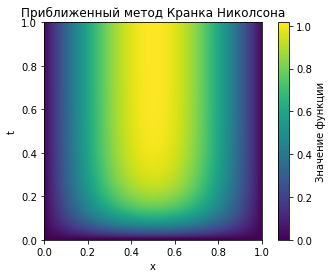

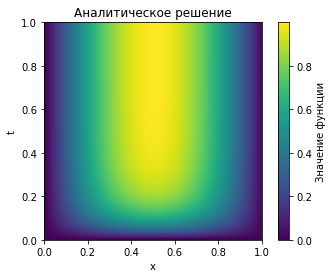

In [17]:
def func1(x):
    return math.pi**2 * math.sin(math.pi * x)

def prec_ans(x, t):
    return (1 - math.exp((-math.pi**2 * t))) * math.sin(math.pi * x)

def Krank_nik(u_0, func, h_t, h_x):
    n_t = int(T_t / h_t)
    n_x = int(T_x / h_x)
    f = np.array([func(i / n_x) for i in range(n_x)])
    B = np.zeros((n_x, n_x))
    C = np.zeros((n_x, n_x))

    for i in range(n_x):
        B[i][i] = 1 + 2 * lmbd
        C[i][i] = 1 - 2 * lmbd

    for i in range(n_x - 1):
        B[i + 1][i] = -lmbd
        B[i][i + 1] = -lmbd
        C[i + 1][i] = lmbd
        C[i][i + 1] = lmbd

    B_inv = np.linalg.inv(B)
    U = [u_0]

    for i in range(1, n_t):
        u = B_inv @ (f * h_t + C @ U[i - 1])
        U.append(u)
    return U

T_t = 1
T_x = 1
h_t = 0.01
h_x = 0.01
n_t = int(T_t / h_t)
n_x = int(T_x / h_x)
lmbd = h_t / (2 * h_x**2)
u_0 = np.zeros(n_x)

U = Krank_nik(u_0, func1, h_t, h_x)

plt.imshow(U, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar(label='Значение функции')  # Добавляем цветовую шкалу
plt.xlabel('x')
plt.ylabel('t')
plt.title('Приближенный метод Кранка Николсона')
plt.show()

U_real = []

for i in range(n_t):
    t = i * h_t
    U_real.append([])
    for j in range(n_x):
        x = j * h_x
        U_real[i].append(prec_ans(x, t))

plt.imshow(U_real, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar(label='Значение функции')  # Добавляем цветовую шкалу
plt.xlabel('x')
plt.ylabel('t')
plt.title('Аналитическое решение')
plt.show()


Визиуально результаты сходятся. Теперь проверим сходимость данного метода.

[0.34658335793053363, 0.1843757572201434, 0.09513478830312161, 0.0483210732334377, 0.024350872411479617, 0.012223249288928647, 0.006123605968663153]


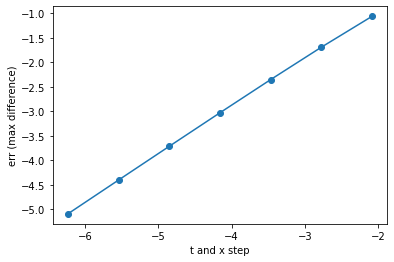

In [34]:
T_t = 1
T_x = 1
h_steps = [2**(-i) for i in range(3, 10)]
t_steps = h_steps
errs = []

def err(x, y):
    er = np.max(np.array([np.max(abs(x[i] - y[i])) for i in range(len(x))]))
    return er

for i in range(len(h_steps)):
    h_t = h_steps[i]
    h_x = t_steps[i]
    n_t = int(T_t / h_t)
    n_x = int(T_x / h_x)
    lmbd = h_t / (2 * h_x**2)
    u_0 = np.zeros(n_x)
    U = Krank_nik(u_0, func1, h_t, h_x)

    U_real = []

    for i in range(n_t):
        t = i * h_t
        U_real.append([])
        for j in range(n_x):
            x = j * h_x
            U_real[i].append(prec_ans(x, t))

    errs.append(err(U_real, U))

ln_h_steps = [math.log(h_steps[i]) for i in range(len(h_steps))]
ln_errs = [math.log(errs[i]) for i in range(len(errs))]
print(errs)
plt.plot(ln_h_steps, ln_errs, marker='o')
plt.xlabel('t and x step')
plt.ylabel('err (max difference)')
plt.show()

Из графика видно, что сходимость первого порядка по шагу (из 1ого порядка по времени)